# Lecture 1 - Programming Assignment

## Data Set


In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('oasis_dataset.csv')

# Print the dataframe
print(df)

     entry_number subject_id  visit  time_of_ad m_f  educ  ses  age  mr_delay  \
0               1  OAS2_0002      1         NaN   M    12   -1   75         0   
1               2  OAS2_0002      2         NaN   M    12   -1   76       560   
2               3  OAS2_0002      3         NaN   M    12   -1   80      1895   
3               4  OAS2_0007      1         3.0   M    16   -1   71         0   
4               5  OAS2_0007      3         3.0   M    16   -1   73       518   
..            ...        ...    ...         ...  ..   ...  ...  ...       ...   
110           111  OAS2_0184      1         2.0   F    16    3   72         0   
111           112  OAS2_0184      2         2.0   F    16    3   73       553   
112           113  OAS2_0185      1         NaN   M    16    1   80         0   
113           114  OAS2_0185      2         NaN   M    16    1   82       842   
114           115  OAS2_0185      3         NaN   M    16    1   86      2297   

     e_tiv  n_wbv    asf  


In [2]:
import warnings

warnings.filterwarnings('ignore')

## Data Set Summary

The <strong>OASIS dataset</strong>, widely used in neuroimaging and medical research, comprises brain imaging data and associated clinical variables. A core aspect of analyzing such datasets involves mitigating confounding variables to ensure robust and reliable conclusions. <strong>Balanced Risk Set Matching (BRSM)</strong> is a statistical technique designed to enhance comparability between groups in observational studies, particularly when studying treatments or conditions that evolve over time. This essay presents a summary of the OASIS dataset, emphasizing how the <strong>Balanced Risk Set Matching</strong> approach aids in addressing biases in observational studies.

In [3]:
import pandas as pd

df = pd.read_csv('oasis_dataset.csv', delimiter=',')

df.rename(columns={
    "entry_number": "Entry Number",
    "subject_id": "Subject ID",
    "visit": "Visit Number",
    "time_of_ad": "Time of AD Diagnosis",
    "m_f": "Gender",
    "educ": "Education (Years)",
    "ses": "Socioeconomic Status",
    "age": "Age",
    "mr_delay": "MRI Delay (Days)",
    "e_tiv": "Estimated Total Intracranial Volume",
    "n_wbv": "Normalized Whole Brain Volume",
    "asf": "Atlas Scaling Factor"
}, inplace=True)

# Define a mapping for better readability
covariate_labels = {
    "educ": "Education (Years)",
    "ses": "Socioeconomic Status",
    "age": "Age",
    "e_tiv": "Estimated Total Intracranial Volume",
    "n_wbv": "Normalized Whole Brain Volume",
    "asf": "Atlas Scaling Factor"
}

df.head()


,Entry Number,Subject ID,Visit Number,Time of AD Diagnosis,Gender,Education (Years),Socioeconomic Status,Age,MRI Delay (Days),Estimated Total Intracranial Volume,Normalized Whole Brain Volume,Atlas Scaling Factor
0,1,OAS2_0002,1,NaN,M,12,-1,75,0,1678,0.736,1.046
1,2,OAS2_0002,2,NaN,M,12,-1,76,560,1738,0.713,1.010
2,3,OAS2_0002,3,NaN,M,12,-1,80,1895,1698,0.701,1.034
3,4,OAS2_0007,1,3.0,M,16,-1,71,0,1357,0.748,1.293
4,5,OAS2_0007,3,3.0,M,16,-1,73,518,1365,0.727,1.286


## Data Preprocessing

In [4]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis

# Load the dataset
df = pd.read_csv("oasis_dataset.csv")

# Drop the first unnamed column
df = df.drop(columns=df.columns[0])

# Handle missing values (if any)
df = df.dropna()

# Display the first few rows
df = df.sort_values(by=["subject_id", "visit"]).groupby("subject_id").first().reset_index()

print(df)

   subject_id  visit  time_of_ad m_f  educ  ses  age  mr_delay  e_tiv  n_wbv  \
0   OAS2_0007      1         3.0   M    16   -1   71         0   1357  0.748   
1   OAS2_0014      1         2.0   M    16    3   76         0   1602  0.697   
2   OAS2_0028      1         2.0   M    18    2   64         0   1547  0.737   
3   OAS2_0046      1         2.0   F    15    2   83         0   1476  0.750   
4   OAS2_0050      1         2.0   M    12    4   71         0   1461  0.724   
5   OAS2_0079      1         2.0   F    12    4   69         0   1447  0.759   
6   OAS2_0089      1         3.0   M    12    2   70         0   1432  0.692   
7   OAS2_0104      1         2.0   M    16    1   70         0   1568  0.696   
8   OAS2_0114      1         2.0   F    12   -1   76         0   1316  0.727   
9   OAS2_0150      1         2.0   F    12    3   73         0   1343  0.720   
10  OAS2_0160      1         2.0   M    12   -1   76         0   1557  0.705   
11  OAS2_0181      1         2.0   F    

## Matching Based on Covariates

In [5]:
# Function to calculate Mahalanobis distance
def calculate_mahalanobis_distance(df, treated_id, control_id, covariates):
    # Extract the rows for the treated and control subjects
    treated = df[df['subject_id'] == treated_id][covariates].values.flatten()
    control = df[df['subject_id'] == control_id][covariates].values.flatten()
    
    # Check if the covariates are available for both subjects
    if len(treated) == 0 or len(control) == 0:
        raise ValueError(f"Covariates are missing for subject {treated_id} or {control_id}.")
    
    # Calculate the covariance matrix and its inverse
    cov_matrix = np.cov(df[covariates].T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    # Calculate the Mahalanobis distance
    return mahalanobis(treated, control, inv_cov_matrix)

## Optimal Balanced Matching

In [6]:
import pandas as pd
from scipy.spatial.distance import mahalanobis
import networkx as nx

# Function to perform optimal balanced matching
def optimal_balanced_matching(df, treated_ids, control_ids, covariates):
    G = nx.DiGraph()
    
    # Add source and sink nodes
    source = 'source'
    sink = 'sink'
    G.add_node(source)
    G.add_node(sink)
    
    # Add treated and control nodes
    for treated_id in treated_ids:
        G.add_node(f'treated_{treated_id}')
        G.add_edge(source, f'treated_{treated_id}', capacity=1, weight=0)
    
    for control_id in control_ids:
        G.add_node(f'control_{control_id}')
        G.add_edge(f'control_{control_id}', sink, capacity=1, weight=0)
    
    # Add edges between treated and control nodes
    for treated_id in treated_ids:
        for control_id in control_ids:
            try:
                distance = calculate_mahalanobis_distance(df, treated_id, control_id, covariates)
                G.add_edge(f'treated_{treated_id}', f'control_{control_id}', capacity=1, weight=distance)
            except ValueError as e:
                print(f"Skipping pair ({treated_id}, {control_id}): {e}")
    
    # Solve the minimum cost flow problem
    flow_dict = nx.max_flow_min_cost(G, source, sink)
    
    # Extract matched pairs
    matched_pairs = []
    for treated_id in treated_ids:
        for control_id in control_ids:
            if flow_dict[f'treated_{treated_id}'][f'control_{control_id}'] > 0:
                matched_pairs.append((treated_id, control_id))
    
    return matched_pairs

# Load the dataset
df = pd.read_csv("oasis_dataset.csv")

# Drop the first unnamed column
df = df.drop(columns=df.columns[0])

#Keep only first visit
df = df.sort_values(by=["subject_id", "visit"]).groupby("subject_id").first().reset_index()

covariates = ['educ', 'ses', 'age', 'e_tiv', 'n_wbv', 'asf']

# Treated subjects are those with a non-missing 'time_of_ad' value
treated_ids = df[df['time_of_ad'].notna()]['subject_id'].unique().tolist()
# Control subjects are those with a missing 'time_of_ad' value
control_ids = df[df['time_of_ad'].isna()]['subject_id'].unique().tolist()

# Perform optimal balanced matching
matched_pairs = optimal_balanced_matching(df, treated_ids, control_ids, covariates)

print("Matched Pairs after Optimal Balanced Matching")
for matched_pair in matched_pairs:
    print(matched_pair)

Matched Pairs after Optimal Balanced Matching
('OAS2_0007', 'OAS2_0139')
('OAS2_0014', 'OAS2_0102')
('OAS2_0028', 'OAS2_0124')
('OAS2_0046', 'OAS2_0108')
('OAS2_0079', 'OAS2_0098')
('OAS2_0089', 'OAS2_0111')
('OAS2_0089', 'OAS2_0113')
('OAS2_0104', 'OAS2_0080')
('OAS2_0114', 'OAS2_0063')
('OAS2_0150', 'OAS2_0112')
('OAS2_0160', 'OAS2_0162')
('OAS2_0160', 'OAS2_0182')
('OAS2_0181', 'OAS2_0159')


## Check Balance Before and After Matching

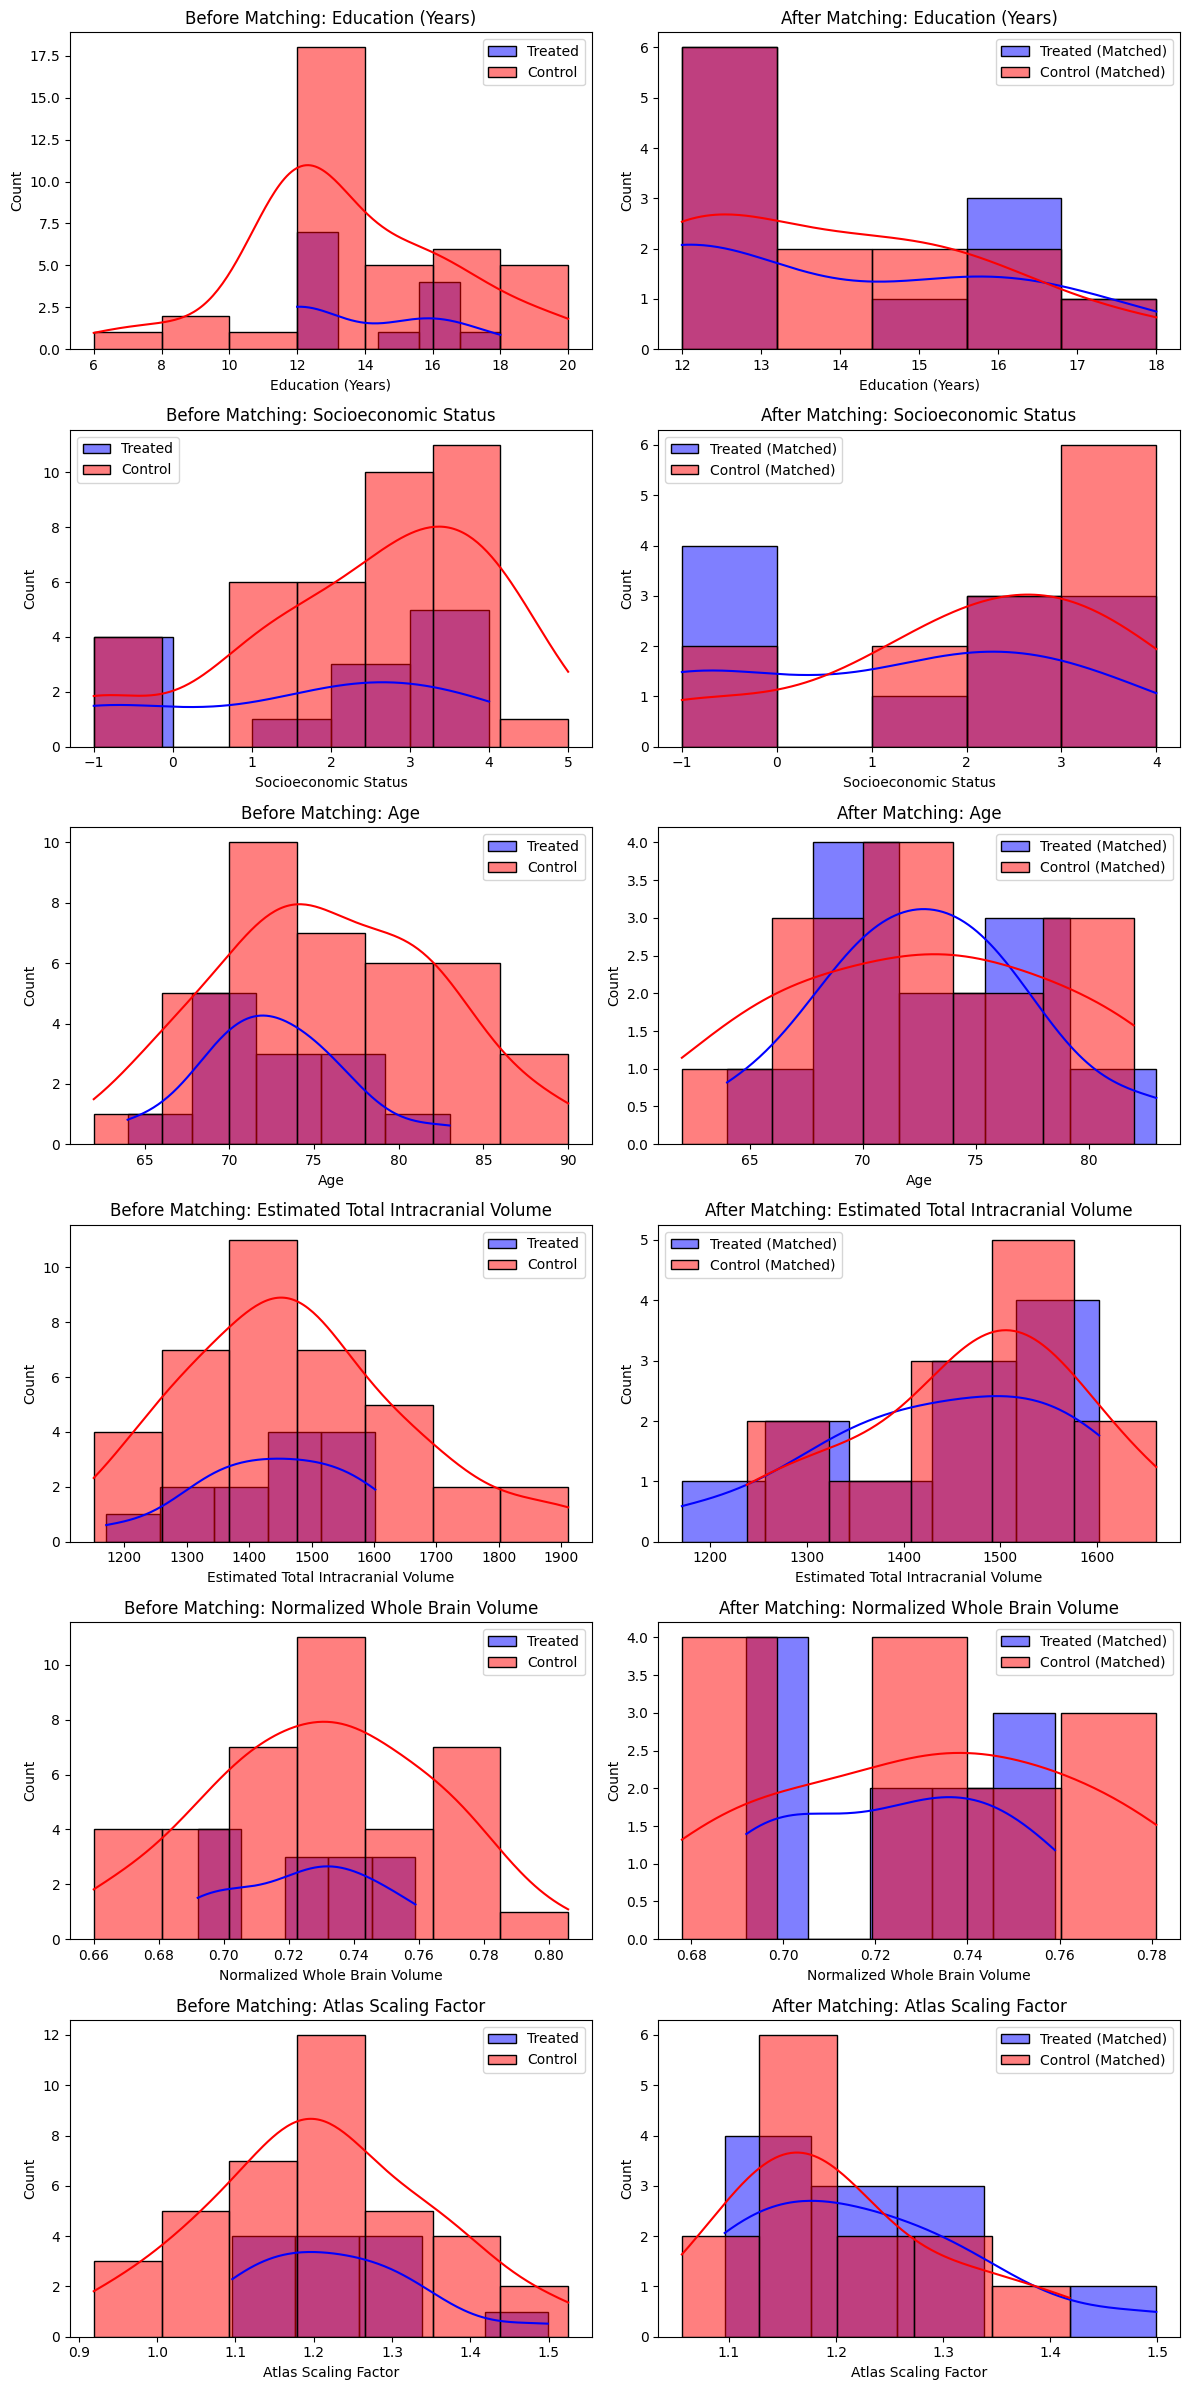

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_covariate_distributions(df, matched_pairs, covariates, covariate_labels):
    treated_matched = df[df["subject_id"].isin([pair[0] for pair in matched_pairs])]
    control_matched = df[df["subject_id"].isin([pair[1] for pair in matched_pairs])]

    fig, axes = plt.subplots(len(covariates), 2, figsize=(12, len(covariates) * 4))

    for i, cov in enumerate(covariates):
        # Before Matching
        sns.histplot(df[df["subject_id"].isin(treated_ids)][cov], kde=True, color="blue", label="Treated", ax=axes[i, 0])
        sns.histplot(df[df["subject_id"].isin(control_ids)][cov], kde=True, color="red", label="Control", ax=axes[i, 0])
        axes[i, 0].set_title(f"Before Matching: {covariate_labels[cov]}")
        axes[i, 0].set_xlabel(covariate_labels[cov])
        axes[i, 0].legend()

        # After Matching
        sns.histplot(treated_matched[cov], kde=True, color="blue", label="Treated (Matched)", ax=axes[i, 1])
        sns.histplot(control_matched[cov], kde=True, color="red", label="Control (Matched)", ax=axes[i, 1])
        axes[i, 1].set_title(f"After Matching: {covariate_labels[cov]}")
        axes[i, 1].set_xlabel(covariate_labels[cov])
        axes[i, 1].legend()

    plt.tight_layout()
    plt.show()

plot_covariate_distributions(df, matched_pairs, covariates, covariate_labels)


## Visualize Matched Pairs as a Bipartite Graph

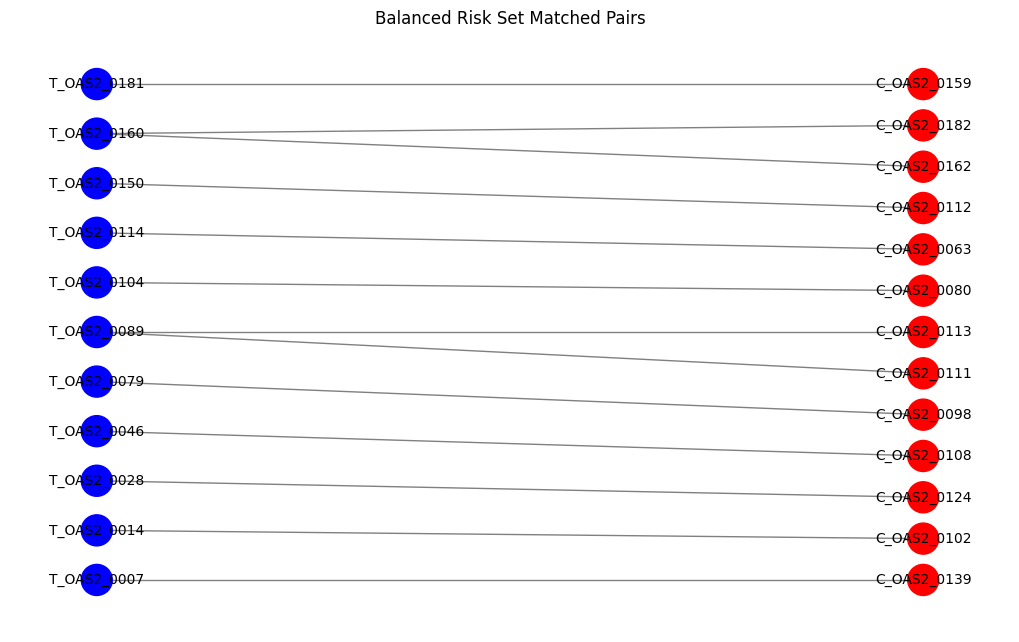

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_matched_pairs(matched_pairs):
    G = nx.Graph()
    
    # Add nodes for treated and control groups
    treated_nodes = [f"T_{t}" for t, c in matched_pairs]
    control_nodes = [f"C_{c}" for t, c in matched_pairs]
    
    G.add_nodes_from(treated_nodes, bipartite=0)
    G.add_nodes_from(control_nodes, bipartite=1)
    
    # Add edges between matched pairs
    edges = [(f"T_{t}", f"C_{c}") for t, c in matched_pairs]
    G.add_edges_from(edges)
    
    # Draw the graph
    plt.figure(figsize=(10, 6))
    pos = nx.bipartite_layout(G, treated_nodes)  # Position treated nodes on one side and control nodes on the other
    nx.draw(G, pos, with_labels=True, node_color=["blue" if n in treated_nodes else "red" for n in G.nodes()],
            edge_color="gray", node_size=500, font_size=10)
    plt.title("Balanced Risk Set Matched Pairs")
    plt.show()

# Call the function to plot the matched pairs
plot_matched_pairs(matched_pairs)


## Sensitivity Analysis for Hidden Bias

In [9]:
import numpy as np
from scipy.stats import norm
from collections import Counter

def sensitivity_analysis(treated, control, covariate):
    if len(treated) != len(control):
        print(f"⚠️ Warning: Treated ({len(treated)}) and Control ({len(control)}) groups are not the same size.")
        min_size = min(len(treated), len(control))
        treated = treated[:min_size]  # Trim to match sizes
        control = control[:min_size]

    gamma_values = [1.0, 1.5, 2.0]  # Levels of hidden bias
    results = []
    
    treated_vals = treated[covariate].values
    control_vals = control[covariate].values

    mean_diff = np.mean(treated_vals) - np.mean(control_vals)
    std_diff = np.std(treated_vals - control_vals)

    for gamma in gamma_values:
        # Adjust the odds ratio for hidden bias
        sensitivity_factor = gamma / (1 + gamma)
        adjusted_stat = mean_diff / (std_diff * sensitivity_factor)
        
        # Calculate p-value
        p_value = 1 - norm.cdf(abs(adjusted_stat))
        results.append((gamma, p_value))

    for gamma, p_val in results:
        print(f"Gamma={gamma}: Sensitivity Analysis p-value = {p_val:.3f}")

control_counts = Counter([pair[1] for pair in matched_pairs])
duplicate_controls = [control for control, count in control_counts.items() if count > 1]

used_controls = set()
filtered_matched_pairs = []

for treated, control in matched_pairs:
    if control not in used_controls:
        filtered_matched_pairs.append((treated, control))
        used_controls.add(control)  # Prevent re-use

matched_pairs = filtered_matched_pairs

# Extract matched treated and control subjects
matched_treated_ids = [pair[0] for pair in matched_pairs]
matched_control_ids = [pair[1] for pair in matched_pairs]

treated_matched = df[df["subject_id"].isin(matched_treated_ids)].copy()
control_matched = df[df["subject_id"].isin(matched_control_ids)].copy()

# Reset indices for alignment
treated_matched = treated_matched.sort_values("subject_id").reset_index(drop=True)
control_matched = control_matched.sort_values("subject_id").reset_index(drop=True)

# Ensure equal sample sizes
min_size = min(len(treated_matched), len(control_matched))
treated_matched = treated_matched.iloc[:min_size]
control_matched = control_matched.iloc[:min_size]

sensitivity_analysis(treated_matched, control_matched, "age")

Gamma=1.0: Sensitivity Analysis p-value = 0.387
Gamma=1.5: Sensitivity Analysis p-value = 0.405
Gamma=2.0: Sensitivity Analysis p-value = 0.415


## Mahalanobis Distance Heatmap

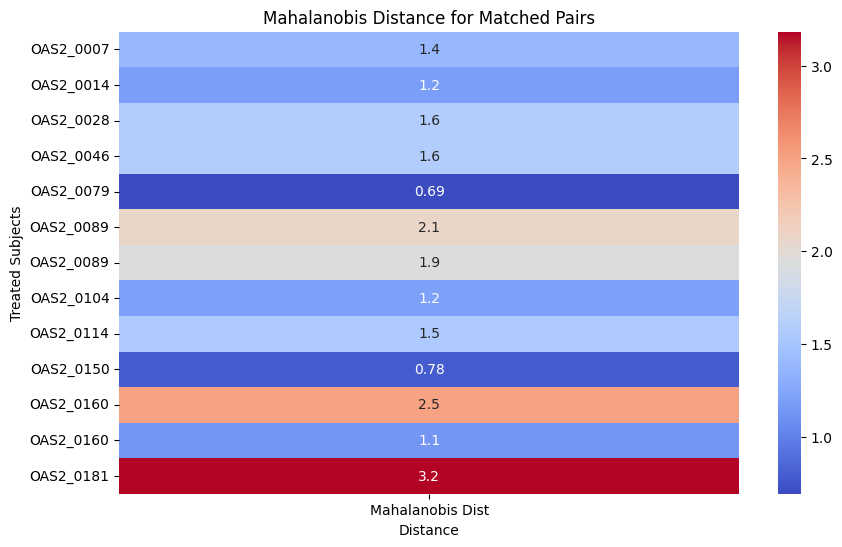

In [10]:
import numpy as np
import seaborn as sns

def plot_mahalanobis_heatmap(df, matched_pairs, covariates):
    distances = []
    treated_labels = []
    
    for treated_id, control_id in matched_pairs:
        distance = calculate_mahalanobis_distance(df, treated_id, control_id, covariates)
        distances.append(distance)
        treated_labels.append(treated_id)

    # Convert distances into a 2D matrix
    dist_matrix = np.array(distances).reshape(len(matched_pairs), 1)

    plt.figure(figsize=(10, 6))
    sns.heatmap(dist_matrix, annot=True, cmap="coolwarm", xticklabels=["Mahalanobis Dist"], yticklabels=treated_labels)
    plt.title("Mahalanobis Distance for Matched Pairs")
    plt.ylabel("Treated Subjects")
    plt.xlabel("Distance")
    plt.show()
# Call the function to plot the heatmap
plot_mahalanobis_heatmap(df, matched_pairs, covariates)


## Visualizing Matched Pairs with Boxplots

Education (Years) P-Value difference: ✅ The treated and control groups are **well-balanced** (p = 0.908).
Socioeconomic Status P-Value difference: ✅ The treated and control groups are **well-balanced** (p = 0.297).
Age P-Value difference: ✅ The treated and control groups are **well-balanced** (p = 0.977).
Estimated Total Intracranial Volume P-Value difference: ✅ The treated and control groups are **well-balanced** (p = 0.750).
Normalized Whole Brain Volume P-Value difference: ✅ The treated and control groups are **well-balanced** (p = 0.543).
Atlas Scaling Factor P-Value difference: ✅ The treated and control groups are **well-balanced** (p = 0.772).


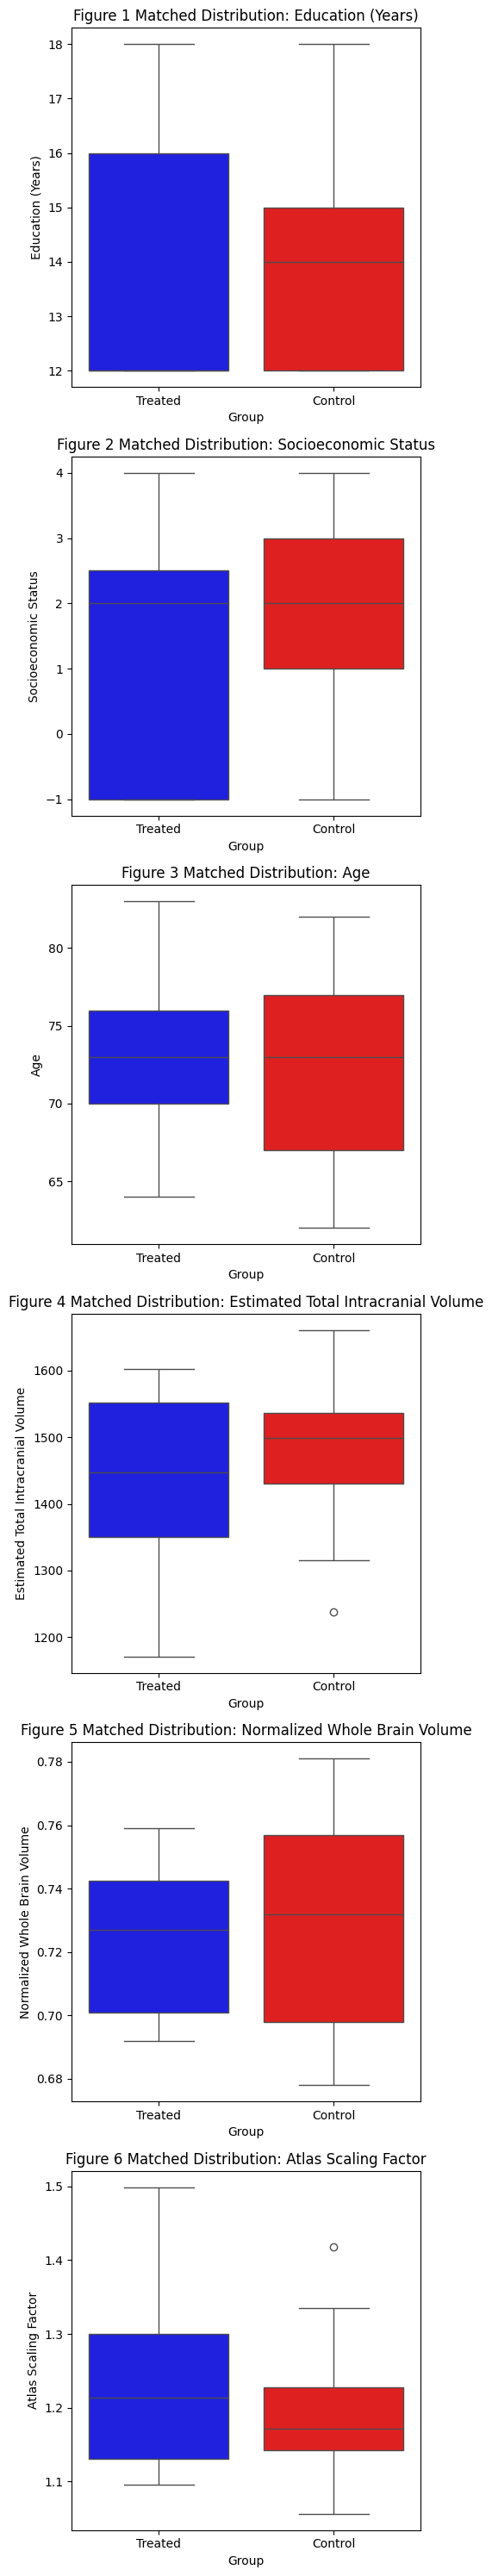

In [13]:
from scipy.stats import ranksums

def plot_matched_boxplots(treated, control, covariates, covariate_labels):
    plt.figure(figsize=(5, len(covariates) * 5))
    
    for i, cov in enumerate(covariates):
        plt.subplot(len(covariates), 1, i + 1)
        
        # Create a DataFrame for visualization
        plot_data = pd.DataFrame({
            "Value": pd.concat([treated[cov], control[cov]], axis=0),
            "Group": ["Treated"] * len(treated) + ["Control"] * len(control)
        })
        
        # Boxplot
        sns.boxplot(x="Group", y="Value", data=plot_data, palette={"Treated": "blue", "Control": "red"})
        
        # Perform statistical test (Wilcoxon rank-sum test)
        stat, p_value = ranksums(treated[cov], control[cov])
        
        if p_value < 0.05:
            description = f"❗ There is a **significant difference** (p = {p_value:.3f}) between treated and control groups."
        else:
            description = f"✅ The treated and control groups are **well-balanced** (p = {p_value:.3f})."
        
        # Add text annotation
        print(f"{covariate_labels[cov]} P-Value difference: {description}")

        # Titles & Labels
        plt.title(f"Figure {i + 1} Matched Distribution: {covariate_labels[cov]}")
        plt.ylabel(covariate_labels[cov])
        plt.xlabel("Group")
    
    plt.tight_layout()
    plt.show()

matched_treated_ids  = [pair[0] for pair in matched_pairs]
matched_control_ids  = [pair[1] for pair in matched_pairs]

treated_matched = df[df["subject_id"].isin(matched_treated_ids)]
control_matched = df[df["subject_id"].isin(matched_control_ids)]

# Call the function to visualize matched pairs
plot_matched_boxplots(treated_matched, control_matched, covariates, covariate_labels)

## Interpreting Results